## <center>Exploração de dados de cotações das Ações listadas na B3</center>

In [16]:
# Imports

# Manipulação dos dados
import numpy as np
import pandas as pd

# Cotações das Ações
import yfinance as yf

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning(Avisos)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [19]:
# Fontes para os gráficos

font_title = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

font_ylabel = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

font_xlabel = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

#### Ticker da Ação | Data inicial e final da coleta dos dados das cotações

In [38]:
ticker = 'ITSA4'
dt_inicial = '2014-01-01'

#### Coleta das cotações e Verificando/Tratando os valores ausentes

In [42]:
df = yf.download(f'{ticker}.SA', start=dt_inicial, threads=False, progress=False)

# Amostra dos dados
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-14,8.07,8.17,7.96,8.10,8.10,25198200.0
2022-07-15,8.11,8.39,8.05,8.35,8.35,28416500.0
2022-07-18,8.29,8.54,8.28,8.43,8.43,24600600.0
2022-07-19,8.48,8.64,8.42,8.59,8.59,19393500.0
2022-07-20,8.58,8.59,8.44,8.46,8.46,16462200.0


In [ ]:
# Verificando informações do dataset
df.info()

In [43]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [45]:
# Verificando alguns dados de medida central
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2.124000e+03
mean,8.910448,9.017414,8.794057,8.905584,7.322545,2.492736e+07
std,2.139138,2.151758,2.118429,2.138191,2.515649,1.272138e+07
min,4.910443,4.965177,4.886985,4.910443,3.286015,0.000000e+00
25%,7.027094,7.121361,6.934828,7.036868,4.695019,1.654008e+07
50%,9.014524,9.110000,8.890887,8.995000,7.609740,2.218099e+07
75%,10.590476,10.704761,10.476190,10.600000,9.523808,3.025531e+07
max,13.523809,13.695238,13.447619,13.666666,12.219234,1.227457e+08


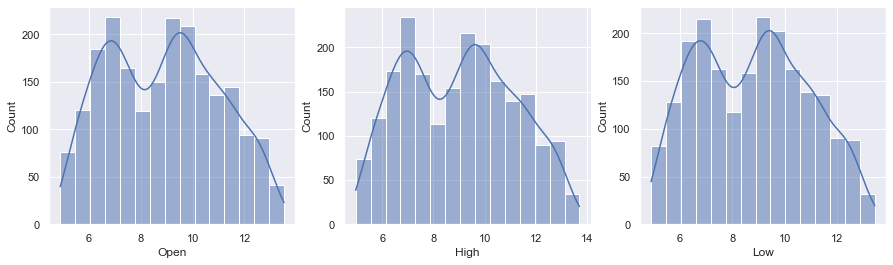

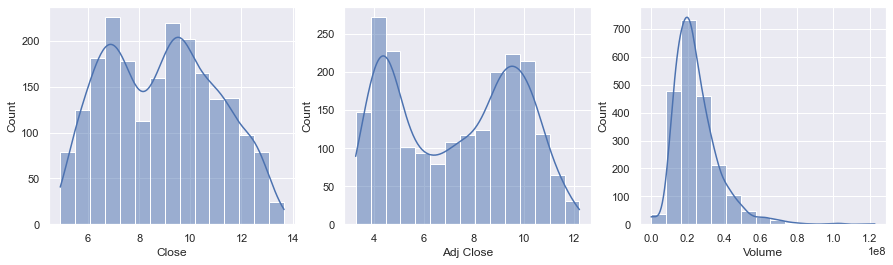

In [69]:
# Histograma das variáveis
figura1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
figura2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15,4))

sns.histplot(df['Open'], bins=15, kde=True, ax=ax1)
sns.histplot(df['High'], bins=15, kde=True, ax=ax2)
sns.histplot(df['Low'], bins=15, kde=True, ax=ax3)
sns.histplot(df['Close'], bins=15, kde=True, ax=ax4)
sns.histplot(df['Adj Close'], bins=15, kde=True, ax=ax5)
sns.histplot(df['Volume'], bins=15, kde=True, ax=ax6)
plt.show()

In [80]:
# Vamos realizar a imputação dos dados ausentes pela mediana
df['Open'].fillna(df['Open'].median(), inplace=True)
df['High'].fillna(df['High'].median(), inplace=True)
df['Low'].fillna(df['Low'].median(), inplace=True)
df['Close'].fillna(df['Close'].median(), inplace=True)
df['Adj Close'].fillna(df['Adj Close'].median(), inplace=True)
df['Volume'].fillna(df['Volume'].median(), inplace=True)

In [81]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Criando novas variáveis 

In [35]:
# Calculando duas médias moveis
mm1 = 50
mm2 = 100

df[f'MM{mm1}'] = df['Adj Close'].rolling(mm1).mean()
df[f'MM{mm2}'] = df['Adj Close'].rolling(mm2).mean()

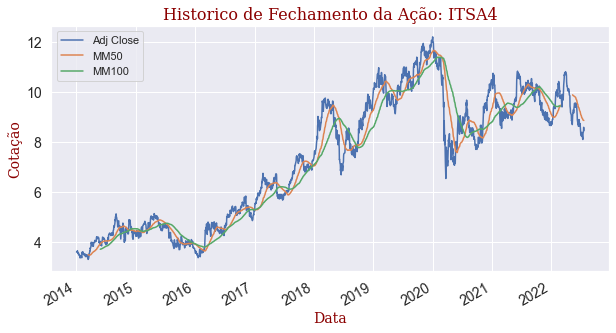

In [36]:
# Visualização do comportamento da Ação ao longo do tempo
sns.set()
df[['Adj Close',f'MM{mm1}',f'MM{mm2}']].plot(figsize = (10, 5))
plt.title(f'Historico de Fechamento da Ação: {ticker}', fontdict=font_title)
plt.ylabel('Cotação', fontdict=font_ylabel)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontdict=font_xlabel)
plt.xticks(fontsize=14)
plt.show()